In [1]:
import pandas as pd

In [12]:
df = pd.read_excel(r"C:\Users\Croma Campus\Downloads\Financial_Sample.xlsx").bfill()

In [13]:
df.shape

(700, 16)

In [14]:
df.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
 Sales                 0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

In [58]:
sales = [23,56,78,98,67,980,34,52,67,89,56,34]
months = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec']

In [59]:
sum(sales)/len(sales)

136.16666666666666

In [60]:
df = pd.DataFrame({
    'Months':months,
    'Sales':sales
})

In [61]:
df

,Months,Sales
0,Jan,23
1,Feb,56
2,Mar,78
3,Apr,98
4,May,67
5,June,980
6,July,34
7,Aug,52
8,Sep,67
9,Oct,89


In [62]:
df.Sales.mean()

np.float64(136.16666666666666)

In [63]:
df.Sales.std()

np.float64(266.68123066289985)

In [64]:
# Seaborn (Diagram/plots/charts  (Statistical Analysis))

In [65]:
import seaborn as sns

C:\Users\Croma Campus\AppData\Local\Temp\ipykernel_5608\3277161747.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Sales)


<Axes: xlabel='Sales', ylabel='Density'>

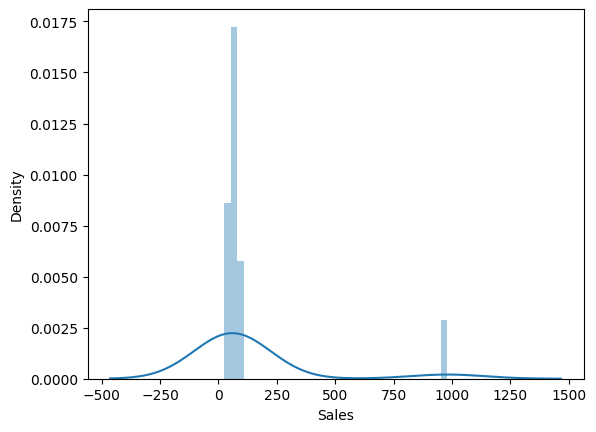

In [66]:
sns.distplot(df.Sales)

<Axes: ylabel='Sales'>

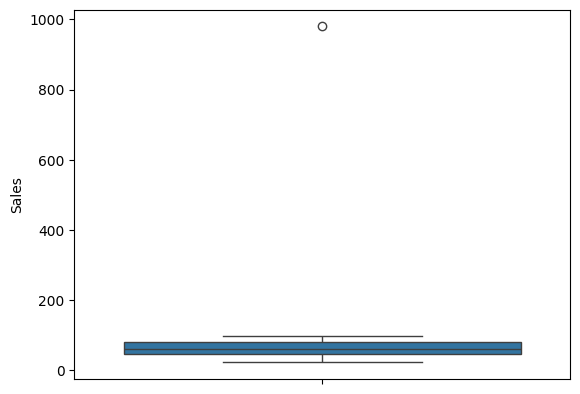

In [67]:
sns.boxplot(df.Sales)

In [68]:
# IQR (Interquantile Range)

In [70]:
df.describe()

,Sales
count,12.000000
mean,136.166667
std,266.681231
min,23.000000
25%,47.500000
50%,61.500000
75%,80.750000
max,980.000000


In [71]:
Q1 = df.Sales.quantile(0.25)
Q3 = df.Sales.quantile(0.75)
IQR = Q3-Q1
min_value = Q1-1.5*IQR
max_value = Q3+1.5*IQR
IQR , min_value , max_value

(np.float64(33.25), np.float64(-2.375), np.float64(130.625))

In [72]:
newdf = df[df.Sales<max_value]
newdf = newdf[newdf.Sales>min_value]

In [73]:
newdf

,Months,Sales
0,Jan,23
1,Feb,56
2,Mar,78
3,Apr,98
4,May,67
6,July,34
7,Aug,52
8,Sep,67
9,Oct,89
10,Nov,56


In [75]:
df.Sales.sum()

np.int64(1634)

In [76]:
newdf.Sales.mean()

np.float64(59.45454545454545)

In [79]:
newdf.to_csv('final.csv')

In [80]:
# z_score

In [81]:
df['z_score'] = (df.Sales - df.Sales.mean())/df.Sales.std()

In [82]:
df

,Months,Sales,z_score
0,Jan,23,-0.424352
1,Feb,56,-0.300609
2,Mar,78,-0.218113
3,Apr,98,-0.143117
4,May,67,-0.259361
5,June,980,3.164202
6,July,34,-0.383104
7,Aug,52,-0.315608
8,Sep,67,-0.259361
9,Oct,89,-0.176865


In [87]:
newdf = df[df.z_score<3]
newdf = newdf[newdf.z_score>-3]

In [88]:
newdf

,Months,Sales,z_score
0,Jan,23,-0.424352
1,Feb,56,-0.300609
2,Mar,78,-0.218113
3,Apr,98,-0.143117
4,May,67,-0.259361
6,July,34,-0.383104
7,Aug,52,-0.315608
8,Sep,67,-0.259361
9,Oct,89,-0.176865
10,Nov,56,-0.300609


In [89]:
df = pd.read_excel(r"C:\Users\Croma Campus\Downloads\Financial_Sample.xlsx").bfill()

In [90]:
df.shape

(700, 16)

In [91]:
df.isnull().sum()

Segment                0
Country                0
Product                0
Discount Band          0
Units Sold             0
Manufacturing Price    0
Sale Price             0
Gross Sales            0
Discounts              0
 Sales                 0
COGS                   0
Profit                 0
Date                   0
Month Number           0
Month Name             0
Year                   0
dtype: int64

In [92]:
import numpy as np

In [100]:
out_col = []
for col in df.select_dtypes(include=np.number).columns:
    print(col,'\tAverage : ',round(df[col].mean(),2),'\tSTD : ',round(df[col].std(),2))
    if df[col].mean()<df[col].std():
        out_col.append(col)
print("Outlier Columns :",out_col)

Units Sold 	Average :  1603.37 	STD :  866.3
Manufacturing Price 	Average :  96.48 	STD :  108.6
Sale Price 	Average :  118.33 	STD :  136.95
Gross Sales 	Average :  182819.84 	STD :  254222.69
Discounts 	Average :  13173.74 	STD :  22969.1
 Sales 	Average :  169609.07 	STD :  236726.35
COGS 	Average :  145475.21 	STD :  203865.51
Profit 	Average :  24133.86 	STD :  42760.63
Month Number 	Average :  7.9 	STD :  3.38
Year 	Average :  2013.75 	STD :  0.43
Outlier Columns : ['Manufacturing Price', 'Sale Price', 'Gross Sales', 'Discounts', ' Sales', 'COGS', 'Profit']


In [102]:
df['Sale Price'].unique()

array([ 20.,  15., 350.,  12., 125., 300.,   7.])

In [103]:
newdf = df

In [104]:
for col in out_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    min_value = Q1-1.5*IQR
    max_value = Q3+1.5*IQR
    newdf = newdf[newdf[col]<max_value]
    newdf = newdf[newdf[col]>min_value]

In [105]:
newdf.shape

(568, 16)

In [106]:
newdf.describe()

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Year
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568,568.000000,568.000000
mean,1504.553697,93.711268,72.764085,79062.387324,5442.371180,73546.204085,64371.968310,9174.235775,2014-04-27 13:05:54.929577472,7.940141,2013.742958
min,200.000000,3.000000,7.000000,1799.000000,0.000000,1655.080000,918.000000,-24160.000000,2013-09-01 00:00:00,1.000000,2013.000000
25%,745.875000,5.000000,12.000000,14160.000000,632.490000,13281.240000,6641.250000,2280.450000,2013-12-01 00:00:00,6.000000,2013.000000
50%,1384.500000,10.000000,15.000000,29173.500000,1776.700000,27286.875000,15140.000000,6857.125000,2014-06-01 00:00:00,9.000000,2014.000000
75%,2145.000000,250.000000,125.000000,95900.000000,5362.500000,91196.000000,85170.000000,14772.600000,2014-09-01 00:00:00,10.000000,2014.000000
max,4492.500000,260.000000,350.000000,530437.500000,37488.000000,527437.500000,509220.000000,52200.000000,2014-12-01 00:00:00,12.000000,2014.000000
std,876.260443,107.648594,105.568591,107128.898973,8531.529689,100441.016034,98148.291777,12154.475492,NaN,3.341779,0.437388


In [107]:
for col in newdf.select_dtypes(include=np.number).columns:
    print(col,'\tAverage : ',round(newdf[col].mean(),2),'\tSTD : ',round(newdf[col].std(),2))

Units Sold 	Average :  1504.55 	STD :  876.26
Manufacturing Price 	Average :  93.71 	STD :  107.65
Sale Price 	Average :  72.76 	STD :  105.57
Gross Sales 	Average :  79062.39 	STD :  107128.9
Discounts 	Average :  5442.37 	STD :  8531.53
 Sales 	Average :  73546.2 	STD :  100441.02
COGS 	Average :  64371.97 	STD :  98148.29
Profit 	Average :  9174.24 	STD :  12154.48
Month Number 	Average :  7.94 	STD :  3.34
Year 	Average :  2013.74 	STD :  0.44


In [108]:
132/7

18.857142857142858